<a href="https://colab.research.google.com/github/CharlesPrado23/BCDataScience1T22N/blob/main/Regressao_Linear/DataWrangling_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
#dfClean = pd.read_csv('dirtydata_Semana5.csv')
dfClean = pd.read_csv('https://raw.githubusercontent.com/CharlesPrado23/BCDataScience1T22N/main/Pandas%2BDataWrangling/data.csv')
dfClean

In [ ]:
### Análise Exploratória ## 
### Head - Visualização

In [ ]:
### Unique 

In [ ]:
#### Verifica se tem duplicatas no Dataframe ###3


In [ ]:
### Remove as duplicatas ??? ####


In [ ]:
### Verifica se tem valores nulos na tabela ###
dfClean.isnull().sum()

In [ ]:
### Qual ou Quais coluna(s) tem valores nulos ####


In [ ]:
#### Podemos reconstruir ou aproximar esses valores nulos por valores não-nulos ? ##### 


In [ ]:
dfClean.to_csv('dataClean.csv')

In [3]:
## Visualização do DataFrame ###### 
dfClean.Calories.plot

In [ ]:
dfClean.plot(kind='scatter', x='Duration', y='Calories')

### Regressão Linear #####



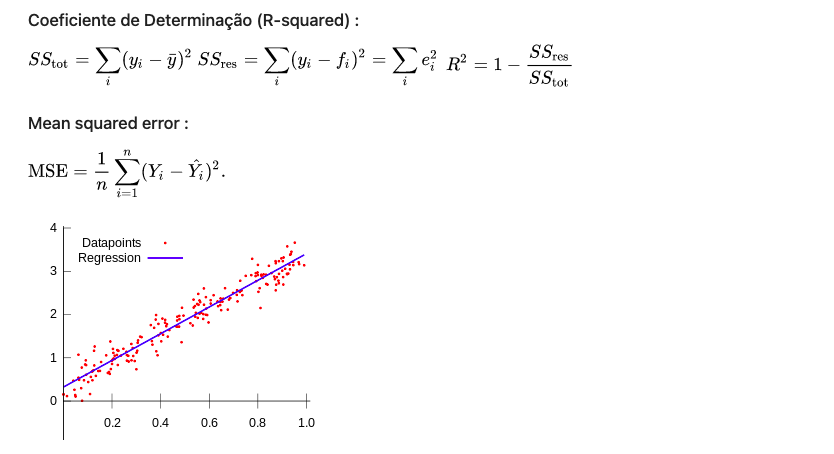

In [ ]:
dfClean.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,377.435802
std,43.151882,14.711588,16.471618,267.381758
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,255.075000
50%,60.000000,105.500000,131.000000,320.700000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


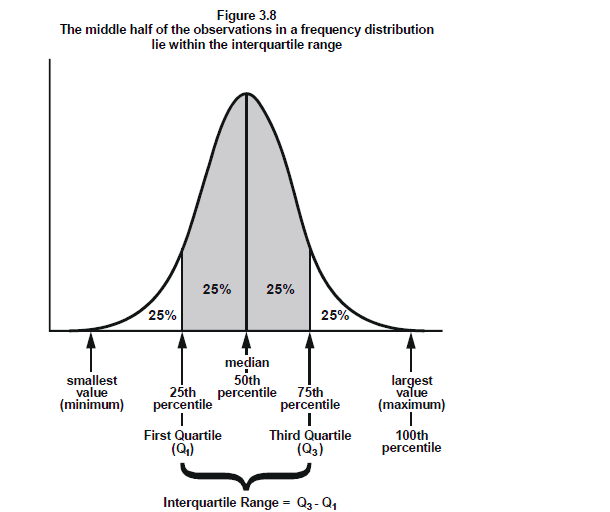

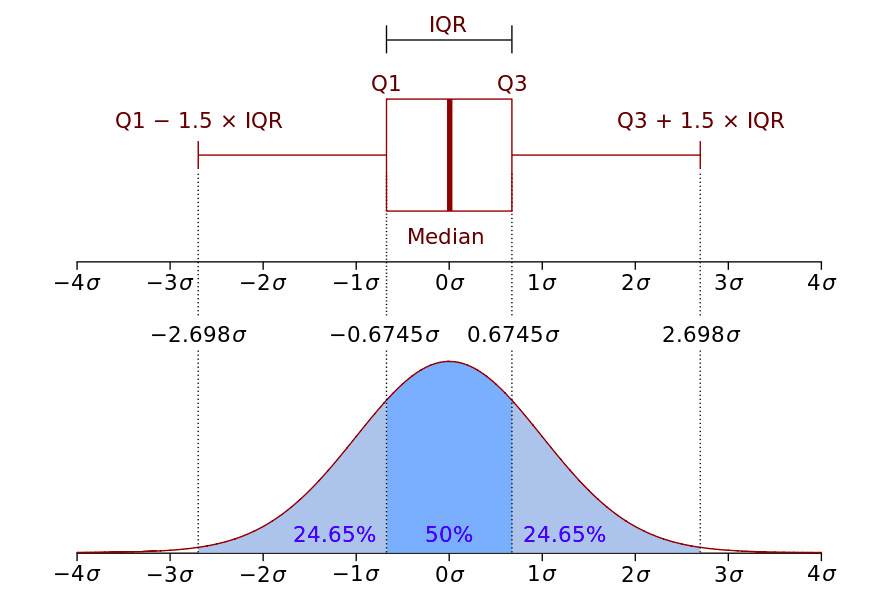

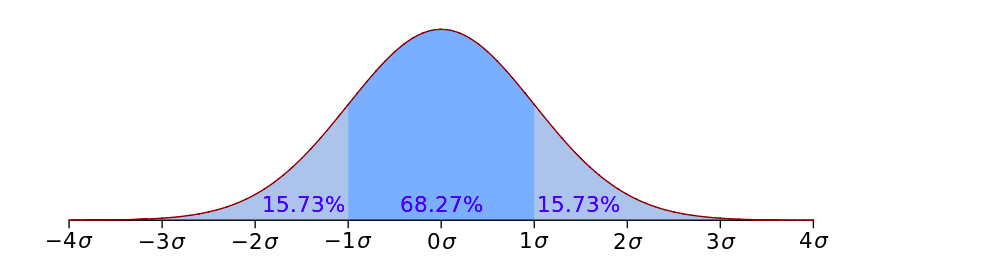

In [ ]:
dfClean.corr()

In [ ]:
### P-Values
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dfClean['Duration'], dfClean['Calories'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9231899466412405  with a P-value of P = 2.4471846561133977e-68


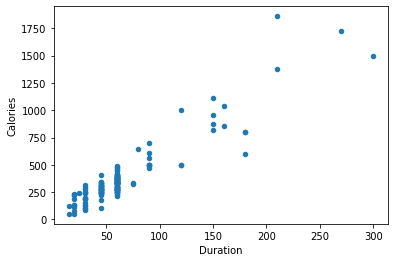

In [ ]:
#### Visualizar Duration x Calories 
dfClean.plot(kind='scatter', x='Duration', y='Calories')

In [ ]:
from sklearn.linear_model import LinearRegression

$$
Yhat = a + b  X
$$

In [ ]:
### R-squared #####


In [ ]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="Duration", y="Calories", data=dfClean)


In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))
x =dfClean['Duration']
y = dfClean['Calories']
sns.residplot(x,y)
plt.show()

<h4>Multiple Linear Regression</h4>

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$



$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

In [ ]:
Xm = dfClean[['Duration','Maxpulse']]
Y = dfClean[['Calories']]

In [ ]:
### R-squared #####


In [ ]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfClean['Calories'], Yhat)
print('The mean square error of Calories and predicted value is: ', mse)

<h4>Polynomial Regression</h4>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\\\
$$

In [ ]:
Xp = dfClean['Duration']
Y = dfClean['Calories']
Xp

In [ ]:
# Here we use a polynomial of the 3rd order (cubic) 
import numpy as np
f = np.polyfit(Xp, Y, 3)
p = np.poly1d(f)
print(p)

In [ ]:
np.polyfit(Xp, Y, 3)

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 300, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Calories ~ Duration')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Calories')

    plt.show()
    plt.close()

In [ ]:
PlotPolly(p, Xp, Y, 'Duration')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r_squared = r2_score(Y, p(Xp))
print('The R-square value is: ', r_squared)

In [ ]:
mean_squared_error(Y, p(Xp))